# Dive Deeper Crime Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

## Simple Linear Regression

Create simpe linear model to predict `inequality` based on `gdp`.

### Read the data

In [2]:
crime = pd.read_csv("data_input/crime.csv", index_col=0)

crime.columns = ['percent_m', 'is_south', 'mean_education', 
                 'police_exp60', 'police_exp59', 'labour_participation',
                 'm_per1000f', 'state_pop', 'nonwhites_per1000', 'unemploy_m24',
                 'unemploy_m39', 'gdp', 'inequality', 'prob_prison', 'time_prison',  
                 'crime_rate']

crime.head()

,percent_m,is_south,mean_education,police_exp60,police_exp59,labour_participation,m_per1000f,state_pop,nonwhites_per1000,unemploy_m24,unemploy_m39,gdp,inequality,prob_prison,time_prison,crime_rate
1,151,1,91,58,56,510,950,33,301,108,41,394,261,0.084602,26.2011,791
2,143,0,113,103,95,583,1012,13,102,96,36,557,194,0.029599,25.2999,1635
3,142,1,89,45,44,533,969,18,219,94,33,318,250,0.083401,24.3006,578
4,136,0,121,149,141,577,994,157,80,102,39,673,167,0.015801,29.9012,1969
5,141,0,121,109,101,591,985,18,30,91,20,578,174,0.041399,21.2998,1234


**Data Description :**

The dataset was collected in 1960 and a full description of the dataset wasn't conveniently available. I use the description I gathered from the authors of the MASS package. After you rename the dataset, the variables are:  
- `percent_m`: percentage of males aged 14-24
- `is_south`: whether it is in a Southern state. 1 for Yes, 0 for No.  
- `mean_education`: mean years of schooling  
- `police_exp60`: police expenditure in 1960  
- `police_exp59`: police expenditure in 1959
- `labour_participation`: labour force participation rate  
- `m_per1000f`: number of males per 1000 females  
- `state_pop`: state population  
- `nonwhites_per1000`: number of non-whites resident per 1000 people  
- `unemploy_m24`: unemployment rate of urban males aged 14-24  
- `unemploy_m39`: unemployment rate of urban males aged 35-39  
- `gdp`: gross domestic product per head  
- `inequality`: income inequality  
- `prob_prison`: probability of imprisonment  
- `time_prison`: avg time served in prisons  
- `crime_rate`: crime rate in an unspecified category

In [3]:
## code here
crime.dtypes


percent_m                 int64
is_south                  int64
mean_education            int64
police_exp60              int64
police_exp59              int64
labour_participation      int64
m_per1000f                int64
state_pop                 int64
nonwhites_per1000         int64
unemploy_m24              int64
unemploy_m39              int64
gdp                       int64
inequality                int64
prob_prison             float64
time_prison             float64
crime_rate                int64
dtype: object

### Adjust Data Type

In [4]:
## code here
crime[['is_south', 'state_pop']] = crime[['is_south', 'state_pop']].astype('category')
crime.dtypes

percent_m                  int64
is_south                category
mean_education             int64
police_exp60               int64
police_exp59               int64
labour_participation       int64
m_per1000f                 int64
state_pop               category
nonwhites_per1000          int64
unemploy_m24               int64
unemploy_m39               int64
gdp                        int64
inequality                 int64
prob_prison              float64
time_prison              float64
crime_rate                 int64
dtype: object

### Check Missing Values

Is there missing value on the data? Do data cleansing steps for `crime` dataset (e.g. adjust data type)

In [5]:
## code here
crime.isnull().sum()


percent_m               0
is_south                0
mean_education          0
police_exp60            0
police_exp59            0
labour_participation    0
m_per1000f              0
state_pop               0
nonwhites_per1000       0
unemploy_m24            0
unemploy_m39            0
gdp                     0
inequality              0
prob_prison             0
time_prison             0
crime_rate              0
dtype: int64

### Exploratory Data Analysis

We want to know how much `gdp` influence `inequality`. Before conducting regression analysis, do the EDA steps to look at the data conditions (how the relation between `gdp` and `inequality`). You can use scatter plot or calculate the correlaion
   - x = gdp
   - y = inequality

In [6]:
crime['gdp'].corr(crime['inequality'])

-0.883997275799851

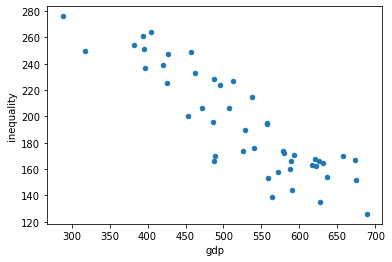

In [7]:
## code here
crime.plot.scatter(x='gdp', y='inequality')
plt.show()


### Build a model

Make a linear regression model to know how much `gdp` influence `inequality`

In [8]:
## code here
# define predictor variable
X_data = crime['gdp']
X_data = sm.add_constant(X_data)

#define target variable
Y_data = crime['inequality']

# build model with outlier
lm_crime = sm.OLS(Y_data, X_data).fit()

lm_crime.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             inequality   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     160.9
Date:                Fri, 10 Dec 2021   Prob (F-statistic):           1.84e-16
Time:                        10:15:36   Log-Likelihood:                -203.70
No. Observations:                  47   AIC:                             411.4
Df Residuals:                      45   BIC:                             415.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        386.0306     15.387     25.089      0.000     355.041     417.021
gdp           -0.3655      0.029    -12.685      0.000      -0.424      -0.307
==============================================================================
Omnibus:                        1.932   Durbin-Watson:                   2.483
Prob(Omnibus):                  0.381   Jarque-Bera (JB):                1.863
Skew:                          -0.429   Prob(JB):                        0.394
Kurtosis:                       2.535   Cond. No.                     2.99e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.99e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

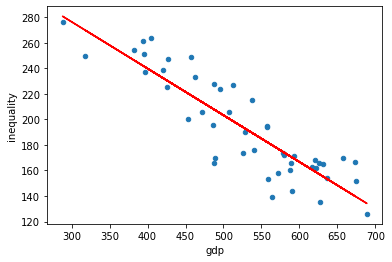

In [9]:
crime.plot.scatter(x='gdp', y='inequality')
plt.plot(crime['gdp'], lm_crime.fittedvalues, c = 'red')
plt.show()

In [10]:
## code here
intercept = lm_crime.params[0]
slope = lm_crime.params[1]
print(intercept)
print(slope)


386.03057571880487
-0.3655058947387452



📝 **Interpretasi model :**



### Predicting

If gdp values are 350, 200, and 540. How much inequlity value?

In [11]:
new_gdp = pd.DataFrame({'gdp': (350, 200, 540)})
new_gdp

,gdp
0,350
1,200
2,540


In [12]:
## code here


x_new = sm.add_constant(new_gdp)

lm_crime.predict(x_new)

0    258.103513
1    312.929397
2    188.657393
dtype: float64

In [13]:
crime['inequality_pred'] = lm_crime.predict(X_data)
crime.head()

,percent_m,is_south,mean_education,police_exp60,police_exp59,labour_participation,m_per1000f,state_pop,nonwhites_per1000,unemploy_m24,unemploy_m39,gdp,inequality,prob_prison,time_prison,crime_rate,inequality_pred
1,151,1,91,58,56,510,950,33,301,108,41,394,261,0.084602,26.2011,791,242.021253
2,143,0,113,103,95,583,1012,13,102,96,36,557,194,0.029599,25.2999,1635,182.443792
3,142,1,89,45,44,533,969,18,219,94,33,318,250,0.083401,24.3006,578,269.799701
4,136,0,121,149,141,577,994,157,80,102,39,673,167,0.015801,29.9012,1969,140.045109
5,141,0,121,109,101,591,985,18,30,91,20,578,174,0.041399,21.2998,1234,174.768169


In [14]:
## code here
from statsmodels.tools.eval_measures import rmse
from statsmodels.tools.eval_measures import meanabs
import math


### Evaluation

Calculate error from model `lm_crime` (e.g. RMSE or MAE)

**RMSE**

In [15]:
rmse(crime['inequality'], crime['inequality_pred'])

18.451608496797242

**MAE**

In [16]:
## code here
meanabs(crime['inequality'], crime['inequality_pred'])


15.021629361814721

## Multiple Linear Regression

Previously we have already predict `inequality` using `gdp` as predictor variable. Now, try to predict `inequality` using all predictor.

### Data Cleansing

In [20]:
## code here
## check categories value on Segment
crime['is_south'].unique()


[1, 0]
Categories (2, int64): [1, 0]

### Exploratory Data Analysis

Observe the relation between target and each predictor 

In [22]:
crime.isna().sum()

percent_m               0
is_south                0
mean_education          0
police_exp60            0
police_exp59            0
labour_participation    0
m_per1000f              0
state_pop               0
nonwhites_per1000       0
unemploy_m24            0
unemploy_m39            0
gdp                     0
inequality              0
prob_prison             0
time_prison             0
crime_rate              0
inequality_pred         0
dtype: int64

In [23]:
crime.dtypes

percent_m                  int64
is_south                category
mean_education             int64
police_exp60               int64
police_exp59               int64
labour_participation       int64
m_per1000f                 int64
state_pop               category
nonwhites_per1000          int64
unemploy_m24               int64
unemploy_m39               int64
gdp                        int64
inequality                 int64
prob_prison              float64
time_prison              float64
crime_rate                 int64
inequality_pred          float64
dtype: object

In [19]:
crime.head()

,percent_m,is_south,mean_education,police_exp60,police_exp59,labour_participation,m_per1000f,state_pop,nonwhites_per1000,unemploy_m24,unemploy_m39,gdp,inequality,prob_prison,time_prison,crime_rate,inequality_pred
1,151,1,91,58,56,510,950,33,301,108,41,394,261,0.084602,26.2011,791,242.021253
2,143,0,113,103,95,583,1012,13,102,96,36,557,194,0.029599,25.2999,1635,182.443792
3,142,1,89,45,44,533,969,18,219,94,33,318,250,0.083401,24.3006,578,269.799701
4,136,0,121,149,141,577,994,157,80,102,39,673,167,0.015801,29.9012,1969,140.045109
5,141,0,121,109,101,591,985,18,30,91,20,578,174,0.041399,21.2998,1234,174.768169


In [31]:
## code here
cat = pd.get_dummies(crime['is_south'], drop_first=True, prefix='is_south')
num = crime.drop



In [32]:
crime.isna().sum()

percent_m                0
is_south                 0
mean_education           0
police_exp60             0
police_exp59             0
labour_participation     0
m_per1000f               0
state_pop                0
nonwhites_per1000        0
unemploy_m24             0
unemploy_m39             0
gdp                      0
inequality               0
prob_prison              0
time_prison              0
crime_rate               0
inequality_pred          0
is_south_yes            42
dtype: int64

### Model Fitting

In [ ]:
## code here



In [ ]:
## code here



### Tunning Model

From summary result we can observe that several predictor variable doesn't have significanly impact to our target variable (indicate that there're p-value > 0.05). So, let's try to remove variable which have high p-value.

In [ ]:
## code here
# membuang prediktor dari yang paling tidak signifikan




In [ ]:
## code here



### Predicting

In [ ]:
## code here



In [ ]:
## code here



### Evaluation

In [ ]:
## code here



In [ ]:
## code here



In [ ]:
## code here



## Assumption Checking

### Linearity

In [ ]:
## code here



### Normality Residual

In [ ]:
## code here



In [ ]:
## code here



In [ ]:
## code here



### No Heteroscedasticity (Homoscedasticity)

In [ ]:
## code here



In [ ]:
## code here



### Little to No Multicolinearity

In [ ]:
## code here



In [ ]:
## code here

